# 1. Análise Exploratória de Dados

O notebook tem o objetivo de entender, categorizar e selecionar as variáveis que serão utilizadas na clusterização.

In [1]:
# Importando os pacotes necessários para o Notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importando a Base de Dados
df_municipios = pd.read_csv('../data/processed/base_unificada.csv', 
                        decimal = ".", 
                        sep = ";")
df_municipios.head()

,Código,Município,Área (km²),"Densidade demográfica, 2000",Distância à capital (km),"Esperança de vida ao nascer, 2000","Mortalidade até um ano de idade, 2000","Taxa de fecundidade total, 2000","Percentual de pessoas de 25 anos ou mais analfabetas, 2000","Renda per Capita, 2000",...,"População de 25 anos ou mais de idade, 1991","População de 25 anos ou mais de idade, 2000","População de 65 anos ou mais de idade, 1991","População de 65 anos ou mais de idade, 2000","População total, 1991","População total, 2000","População urbana, 2000","População rural, 2000",QTD_TOTAL_CNPJ,QTD_TOTAL_CNPJ_SUPERMERCADO
0,520005,Abadia de Goiás (GO),136.9,36.3,21.414308,67.58,27.70,2.85,15.64,205.27,...,1872,2433,121,227,4227,4971,3096,1875,2216.0,22.0
1,310010,Abadia dos Dourados (MG),897.4,7.2,390.876513,72.92,20.51,2.54,14.48,196.36,...,3308,3781,354,459,6492,6446,3927,2519,1131.0,23.0
2,520010,Abadiânia (GO),1047.7,10.9,78.641435,69.59,22.36,2.77,21.81,168.31,...,4241,5918,446,686,9402,11452,7206,4246,2550.0,36.0
3,150010,Abaetetuba (PA),1613.9,73.8,51.184552,70.77,25.61,3.15,24.85,102.14,...,33554,44897,3792,4688,99989,119152,70843,48309,10264.0,254.0
4,310020,Abaeté (MG),1822.4,12.3,172.311549,72.50,21.59,2.41,15.56,253.68,...,10163,12406,1084,1595,20689,22360,19022,3338,5588.0,62.0


In [3]:
df_municipios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5507 entries, 0 to 5506
Data columns (total 27 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Código                                                                 5507 non-null   int64  
 1   Município                                                              5507 non-null   object 
 2   Área (km²)                                                             5507 non-null   float64
 3   Densidade demográfica, 2000                                            5507 non-null   float64
 4   Distância à capital (km)                                               5507 non-null   float64
 5   Esperança de vida ao nascer, 2000                                      5507 non-null   float64
 6   Mortalidade até um ano de idade, 2000                                  5507 non-null   f

## 2. Descrição da Base

A base de municípios tem 5.507 registros, com 25 variáveis. As bases estão separados em: 
 1. **Código**: lista dos municípios brasileiros associados a um código composto de 7 dígitos, sendo os dois primeiros referentes ao código da Unidade da Federação. Fonte: [IBGE.](https://www.ibge.gov.br/explica/codigos-dos-municipios.php)                                                                    
 2. **Município**: nome do munícipio.                                                               
 3. **Área (km²)**: área do municípo em em km2.                                                             
 4. **Densidade demográfica, 2000**: distribuição espacial dos habitantes por quilômetro quadrado e os principais sistemas de transporte. Fonte: [IBGE.](https://www.ibge.gov.br/geociencias/cartas-e-mapas/sociedade-e-economia/15955-densidade-demografica.html?=&t=sobre)                                            
 5. **Distância à capital (km)**: distâncias médias (km) de deslocamento em linha reta com destino a capitais.                                              
 6. **Esperança de vida ao nascer, 2000**: Número médio de anos de vida esperados para um recém-nascido, mantido o padrão de mortalidade existente, em determinado espaço geográfico, no ano considerado. O aumento da esperança de vida ao nascer indica melhoria das condições de vida e saúde da população. Fonte: [Datasus](http://tabnet.datasus.gov.br/cgi/idb2000/fqa10.htm)                                  
 7. **Mortalidade até um ano de idade, 2000**: Distribuição percentual dos óbitos de crianças menores de um ano de idade. Fonte: [Datasus](http://tabnet.datasus.gov.br/tabdata/livroidb/2edrev/a09.pdf)                                
 8. **Taxa de fecundidade total, 2000**: Número médio de filhos nascidos vivos, tidos por uma mulher ao final do seu período reprodutivo, na população residente em determinado espaço geográfico, no ano considerado. Fonte: [Datasus](http://tabnet.datasus.gov.br/tabdata/LivroIDB/2edrev/a05.pdf)
 
 9. **Percentual de pessoas de 25 anos ou mais analfabetas, 2000**: número de pessoas de 25 anos ou mais analfabetas.
 
 10. **Renda per Capita, 2000**: A renda per capita é obtida mediante a divisão da Renda Nacional (isto é, Produto Nacional Bruto menos os gastos de depreciação do capital e os impostos diretos) pelo número de habitantes do país. Fonte: [Wikipedia](https://pt.wikipedia.org/wiki/Renda_per_capita)
 
 11. **Índice de Gini, 2000**: O Índice de Gini é um instrumento para medir o grau de concentração de renda em determinado grupo. Ele aponta a diferença entre os rendimentos dos mais pobres e dos mais ricos. Numericamente, varia de zero a um (alguns apresentam de zero a cem). O valor zero representa a situação de igualdade, ou seja, todos têm a mesma renda. O valor um (ou cem) está no extremo oposto, isto é, uma só pessoa detém toda a riqueza. Na prática, o Índice de Gini costuma comparar os 20% mais pobres com os 20% mais ricos. Fonte: [IPEA](https://www.ipea.gov.br/desafios/index.php?option=com_content&id=2048:catid=28)                                            
 12. **Intensidade da indigência, 2000**: percentual das penssoas consideradas como indigêntes aqueles cuja renda familiar per capita é inferior ao valor necessário para atender tão-somente às necessidades básicas de alimentação. Fonte: [Scielo - Pobreza e indigência no Brasil: algumas evidências empíricas com base na PNAD 2004](https://www.scielo.br/j/neco/a/cGB8zkHj9KqK7nRdVMbB5Pt/?lang=pt)
 
 13. **Intensidade da pobreza, 2000**: percentual das pessoas definidos como pobres os indivíduos cuja renda familiar per capita é inferior ao valor que corresponderia ao necessário para atender a todas as necessidades básicas (alimentação, habitação, transporte, saúde, lazer, educação, etc.). Fonte: [Scielo - Pobreza e indigência no Brasil: algumas evidências empíricas com base na PNAD 2004](https://www.scielo.br/j/neco/a/cGB8zkHj9KqK7nRdVMbB5Pt/?lang=pt)                                          
 14. **Índice de Desenvolvimento Humano Municipal, 2000**: O Índice de Desenvolvimento Humano (IDH) é uma medida resumida do progresso a longo prazo em três dimensões básicas do desenvolvimento humano: renda, educação e saúde. O IDH pretende ser uma medida geral e sintética que, apesar de ampliar a perspectiva sobre o desenvolvimento humano, não abrange nem esgota todos os aspectos de desenvolvimento. Fonte: [PNUD](https://www.br.undp.org/content/brazil/pt/home/idh0.html)                       
 15. **Taxa bruta de freqüência à escola, 2000**: A Taxa de Escolarização Bruta é a razão entre o número total de matrículas (independente da faixa etária) e a população correspondente na faixa etária prevista (15 a 17 anos) para o curso na etapa de ensino. Fonte: [Observatório da Criança e do Adolescente](https://observatoriocrianca.org.br/cenario-infancia/temas/ensino-medio/565-taxa-de-escolarizacao-bruta-e-liquida-no-ensino-medio?filters=1,134)                                 
 16. **Taxa de alfabetização, 2000**: percentual de pessoas maiores de 15 anos que sabem ler e escrever. Fonte [Wikipedia](https://pt.wikipedia.org/wiki/Lista_de_pa%C3%ADses_por_%C3%ADndice_de_alfabetiza%C3%A7%C3%A3o)
 
 17. **Média de anos de estudo das pessoas de 25 anos ou mais de idade, 2000**  
 18. **População de 25 anos ou mais de idade, 1991**                              
 19. **População de 25 anos ou mais de idade, 2000**                              
 20. **População de 65 anos ou mais de idade, 1991**                              
 21. **População de 65 anos ou mais de idade, 2000**                              
 22. **População total, 1991**                                                    
 23. **População total, 2000**                                                    
 24. **População urbana, 2000**                                                   
 25. **População rural, 2000**
 
 26. **Qtd Total CNPJ**: quantidade de total de CNPJs extraídos da Receita Federal do Brasil.
 
 27. **QTD_TOTAL_CNPJ_SUPERMERCADO**: quantidade de total de CNPJs do CNAE 4711301 e 471102, referente aos supermercados disponibilidade pela Receita Federal do Brasil.

In [4]:
df_municipios.describe()

,Código,Área (km²),"Densidade demográfica, 2000",Distância à capital (km),"Esperança de vida ao nascer, 2000","Mortalidade até um ano de idade, 2000","Taxa de fecundidade total, 2000","Percentual de pessoas de 25 anos ou mais analfabetas, 2000","Renda per Capita, 2000","Índice de Gini, 2000",...,"População de 25 anos ou mais de idade, 1991","População de 25 anos ou mais de idade, 2000","População de 65 anos ou mais de idade, 1991","População de 65 anos ou mais de idade, 2000","População total, 1991","População total, 2000","População urbana, 2000","População rural, 2000",QTD_TOTAL_CNPJ,QTD_TOTAL_CNPJ_SUPERMERCADO
count,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,...,5.507000e+03,5.507000e+03,5507.000000,5507.000000,5.507000e+03,5.507000e+03,5.507000e+03,5507.000000,5.454000e+03,5270.000000
mean,324164.517342,1549.211476,96.731869,253.212620,67.748925,34.083376,2.864845,26.668411,170.814160,0.560734,...,1.221264e+04,1.551693e+04,1286.757581,1804.085709,2.666167e+04,3.083333e+04,2.505066e+04,5782.678591,7.371205e+03,84.426755
std,97977.633891,5738.392465,524.006185,163.210532,4.860915,18.470551,0.744454,15.164462,96.425347,0.058663,...,8.923783e+04,1.039028e+05,9290.633699,12584.258093,1.690004e+05,1.867506e+05,1.800123e+05,10438.887430,5.969509e+04,428.905302
min,110001.000000,2.900000,0.100000,0.000000,54.350000,5.380000,1.560000,2.020000,28.380000,0.360000,...,2.390000e+02,4.220000e+02,17.000000,27.000000,6.180000e+02,7.950000e+02,0.000000e+00,0.000000,1.720000e+02,1.000000
25%,251125.000000,205.700000,11.300000,121.858906,64.530000,18.640000,2.320000,13.970000,86.495000,0.520000,...,2.119500e+03,2.502000e+03,241.000000,330.500000,4.945000e+03,5.152500e+03,2.402500e+03,1843.000000,7.920000e+02,9.000000
50%,314467.000000,417.200000,23.600000,228.262939,68.240000,29.510000,2.670000,22.600000,159.100000,0.560000,...,4.084000e+03,4.930000e+03,483.000000,652.000000,9.748000e+03,1.041800e+04,5.314000e+03,3666.000000,1.548500e+03,25.000000
75%,411655.000000,1031.450000,48.000000,358.072044,71.440000,46.150000,3.230000,39.780000,232.695000,0.600000,...,8.104000e+03,1.004000e+04,988.000000,1321.500000,1.897450e+04,2.135650e+04,1.324050e+04,7223.000000,3.818750e+03,63.000000
max,530010.000000,161445.900000,12881.400000,1474.314590,78.180000,109.670000,7.790000,70.260000,954.650000,0.820000,...,5.106165e+06,5.825893e+06,499880.000000,670780.000000,9.649519e+06,1.043425e+07,9.813187e+06,621065.000000,3.602821e+06,22185.000000


Percebe-se, atraves das medias e do desvio padrão, que a escala dos dados é bem diferentes, os dados precisam de normalização.

## 3. Matriz de Correlação

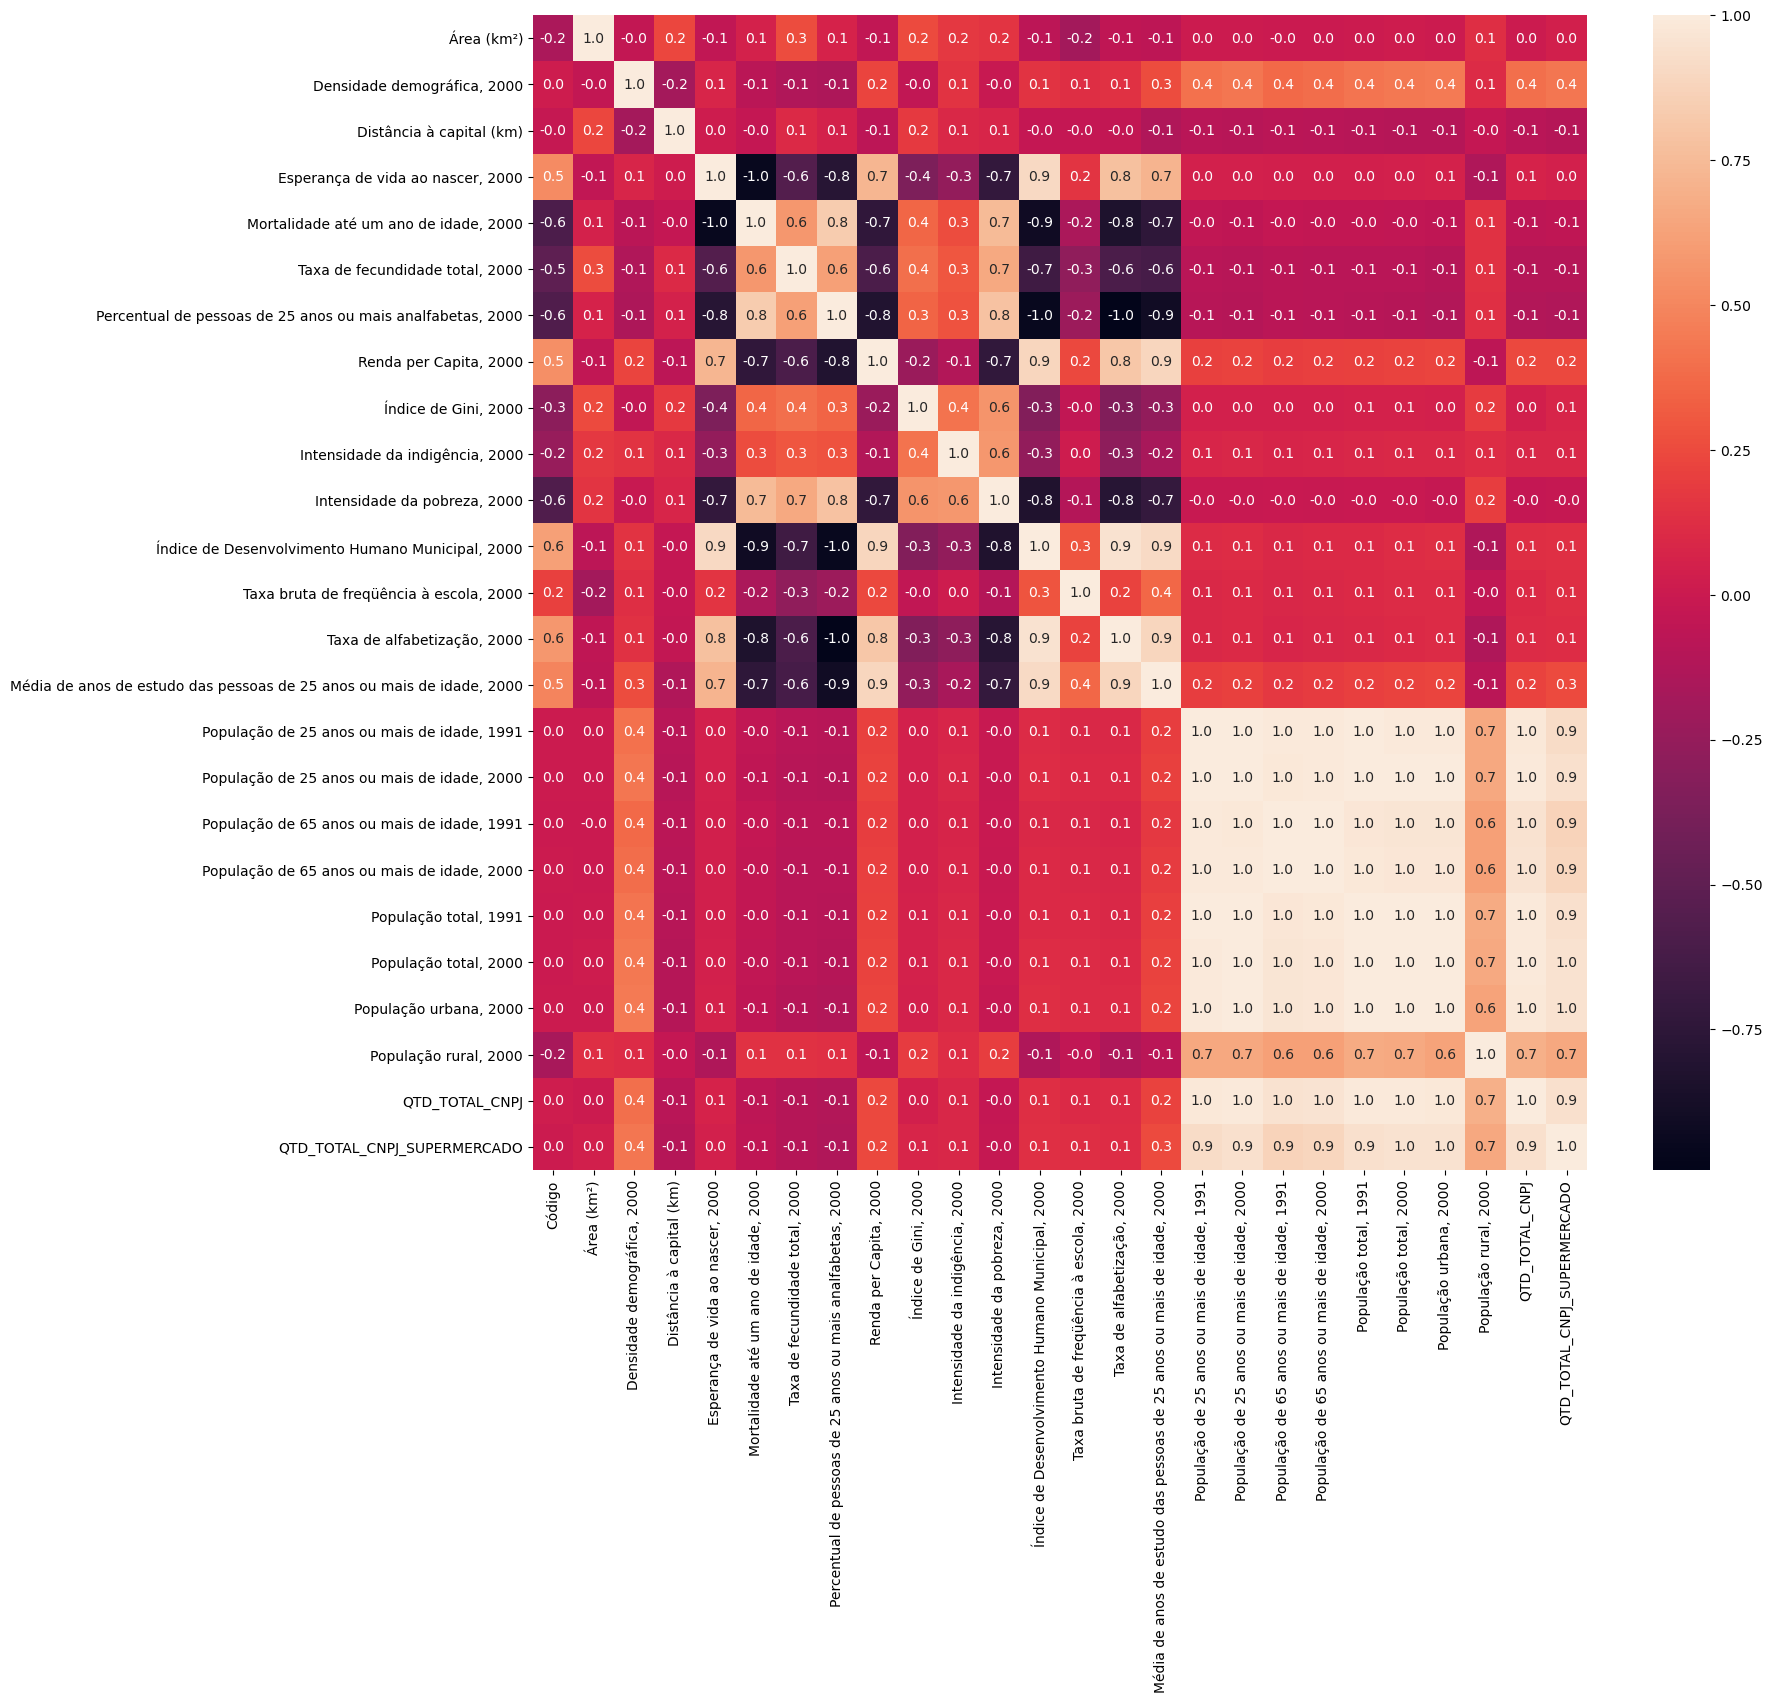

In [9]:
matriz_correlacao = df_municipios.corr().drop('Código')
plt.figure(figsize=(17, 15))
sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f")
plt.show()